In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sys
import os
import time
from IPython.display import display
from pathlib import Path
from pymgrid import MicrogridGenerator as mg
from os.path import isfile, join
from os import listdir
DAY = 86400 # in seconds
HORIZON = 24

In [8]:
def inter(df,original_size):
    i=1
    row_value = [np.nan]
    while True:
        if df.shape[0] == DAY:
            df = df.interpolate()
            return df
        elif i % 2 != 0:
            if i > (original_size*2)-1:
                df = df.interpolate(method='slinear')
                return df
            else:
                np_arr = df.to_numpy(dtype=float)
                np_arr = np.insert(np_arr,i, np.nan)
                #df = Insert_row(row_number, df, row_value)
                df = pd.DataFrame(np_arr, columns=['GH illum (lx)'],)
        i = i+1


In [9]:
def runner(directory_path: str,index: int):
    onlyfiles = [f for f in listdir(directory_path) if isfile(join(directory_path, f))]
    onlyfiles.remove('__init__.py')
    if '.DS_Store'  in onlyfiles:
        onlyfiles.remove('.DS_Store')
    print(onlyfiles)
    file_path = directory_path+onlyfiles[index]
    df_values = pd.read_csv(file_path)
    df_cut = df_values[0:HORIZON]
    size = HORIZON
    limit = DAY
    while size < limit:
        size = df_cut.shape[0]
        df_cut = inter(df_cut,size)
    #    print(size)
    newpath = directory_path+'/interpolated/'+onlyfiles[index].replace('.csv','_interpolated.csv')
    #file_path.replace('.csv','_interpolated.csv')
    df_cut.to_csv(path_or_buf= newpath)

In [10]:


path = (mg.__file__)
path = path.replace('\\MicrogridGenerator.py','')
print(path+'_interpolated')


#PV
pv_path = path+'/data/pv/'
#Load
load_path = path+'/data/load/'
#Wind
wind_path = path+'/data/wind/'
#co2
co2_path = path+'/data/co2/'
i = 0



for i in range(0,2):
    runner(directory_path=co2_path, index = i)



c:\Users\thesu\AppData\Local\Programs\Python\Python310\lib\site-packages\pymgrid_interpolated
['co2_caiso.csv', 'co2_duke.csv']


KeyboardInterrupt: 

The size year data is 8760 data points, the size of a single day of data is 24 data points long


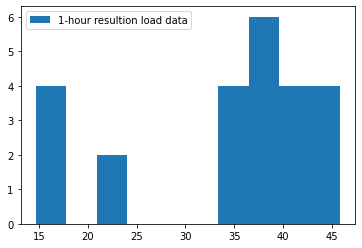

KeyboardInterrupt: 

In [14]:
hour_scale_data_year = pd.read_csv(r"C:\Users\thesu\AppData\Local\Programs\Python\Python310\Lib\site-packages\pymgrid\data\load\RefBldgFullServiceRestaurantNew2004_v1.3_7.1_6A_USA_MN_MINNEAPOLIS.csv")
hour_scale_data_day = hour_scale_data_year[0:24]
print(f'The size year data is {hour_scale_data_year.shape[0]} data points, the size of a single day of data is {hour_scale_data_day.shape[0]} data points long')
size = hour_scale_data_day.shape[0]
limit = DAY # 86400 seconds in 24 hours
sx = np.linspace(0,hour_scale_data_day.shape[0],hour_scale_data_day.shape[0])
plt.hist(hour_scale_data_day)
plt.legend(['1-hour resultion load data'])
plt.show()
while size < limit:
    size = hour_scale_data_day.shape[0]
    hour_scale_data_day = inter(df = hour_scale_data_day, original_size = size)
plt.plot(hour_scale_data_day)
plt.legend(['1-second resultion load data'])
plt.show()


